# e.g. 3: Set up a multi forecast script.

# initially examine nino indice, but adapt to work on any dimensional variable.

# might want to create output file that is written to as the system goes along so that it can be restarted, or examined part of the way through the processing?

# want to create variable which gives time after forecast, so that a plot of forecast start date V lead time can be generated. Perhaps we can look at particular ENSO events to see impact of ensemble as well as other statistics.

# want to create plots (e.g. bar diagram) summarising forecasts and their dates

# last edited 8 August 2018

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
print('BEGIN')

import socket
import re
import os
import sys
import inspect
import pickle
import glob
import bz2

print('sys.version=',sys.version)

hostname=socket.gethostname()

print('hostname=',hostname)

__file__='jupyter_notebook' #this can be deleted when written to a python script and loaded as module.

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import numpy as np
import numpy.ma as ma
from matplotlib.mlab import griddata
import itertools
from multi_forc_funcs import multi_forc_funcs

cafe_experiment_titles = {4:'v0_forecast', 1:'v1_forecast', 3:'v2_forecast', 9:'v1', \
  5:'v2', 6:'v3', 7:'aug17p', 2:'v1_assim', 10:'etkf', 11:'nov17n', 12:'jul18b', 13:'v0'}

%matplotlib inline

CRED = '\033[91m'
CEND = '\033[0m'

output_files_name='eg5_files.pkl'
input_files_name=output_files_name

print('END')

BEGIN
sys.version= 3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 17:14:51) 
[GCC 7.2.0]
hostname= oa-32-cdc
END


In [3]:
print('BEGIN')

SWITCH_OFF=True #temporary for easy skipping of this section.
SWITCH_OFF=False

if(not SWITCH_OFF):
  
  import socket
  import re
  import os
  import sys

  print('sys.version=',sys.version)

  hostname=socket.gethostname()

  print('hostname=',hostname)

  if(re.match('raijin',hostname)):
    print('this is rajin')
    rundir='/short/v14/mac599/cafepp/rundir'
    topdir=''
  elif(re.match('oa-3.-cdc',hostname)):
    print('this is vm32')
    rundir='/OSM/CBR/OA_DCFP/work/col414/cafepp'
    topdir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6'
    topdir_ncep='/OSM/CBR/OA_DCFP/data/CAFEPP/'
  else:
    raise SystemExit('host not known:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  os.chdir(rundir)

  os.chdir('/OSM/CBR/OA_DCFP/work/col414/cafepp')

  print('Current Working Directory=',os.getcwd())
#===============================================================================
  
  from decadal_diag import \
    fractional_year_from_num2date, \
    generate_daily_month_indices, \
    shade_2d_latlon, \
    get_timestamp_number, \
    shade_2d_curvilinear, \
    shade_2d_simple, \
    nino_indices, \
    plot_xy, \
    restrict_input_files, \
    cmor_ripf_parts, \
    cmor_directory_parts, \
    cmor_file_parts, \
    file_spec_summary, \
    file_sort_ripf

  from n_data_funcs import n_data_funcs

#===============================================================================

  ivar_str_forc='tos'
  dvar=ivar_str_forc
  grid_label='gn'
  years=range(2002,2016+1) #2002,2016+1

  forc_files_string=[]
  for icnt,year in enumerate(years):
    #to match all ensembles 1-11 use r*[0,1,2,3,4,5,6,7,8,9]i1p1f1
    forc_files_string.append(glob.glob('/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r*i1p1f1/Omon/'+dvar+'/'+grid_label+'/v20171025/'+dvar+ \
      '_Omon_historical_CAFE-1-0_r*[0,1,2,3,4,5,6,7,8,9]i1p1f1_'+grid_label+'_'+str(year)+'??-??????.nc'))
  merged = sorted(list(itertools.chain.from_iterable(forc_files_string)))
  forc_input_files=sorted(restrict_input_files(merged,24,60)) #72
  
  print('forc_input_files=',forc_input_files)

#===============================================================================

  ivar_str_ncepr2='skt';ifil_prefix_ncepr2='skt';offset=0.0;scale=1.0;long_name='Surface Temperature';units='degC'
  idir=topdir_ncep+'short/r67/mac599/data/NCEP_R1'
  ncepr2_input_files=[[idir+'/'+ifil_prefix_ncepr2+'.mon.mean.nc']]
  
  if(not os.path.exists(ncepr2_input_files[0][0])):
      raise SystemExit('Input file doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
  print('ncepr2_input_files=',ncepr2_input_files)

#===============================================================================

  grid_label='gn'      
  ivar_str_assim='tos';table='Omon'

  ensemble=1
  pval=2 #v1_assim
  assim_input_files=[]
  idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+ \
    '/'+ivar_str_assim+'/'+grid_label+'/v20171025'
  monthly_ifils_assim=[ivar_str_assim+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_'+ \
    grid_label+'_200201-201512.nc']
  for file in monthly_ifils_assim:
    if(not os.path.exists(idir+'/'+file)):
      raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
    else:
      assim_input_files.append(idir+'/'+file)
  assim_input_files=[assim_input_files]
  
  print('assim_input_files=',assim_input_files)
  
#===============================================================================

print('END')

BEGIN
sys.version= 3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 17:14:51) 
[GCC 7.2.0]
hostname= oa-32-cdc
this is vm32
Current Working Directory= /OSM/CBR/OA_DCFP/work/col414/cafepp
Removing  /OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r10i1p1f1/Omon/tos/gn/v20171025/tos_Omon_historical_CAFE-1-0_r10i1p1f1_gn_200701-201212.nc  from list.
Removing  /OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r10i1p1f1/Omon/tos/gn/v20171025/tos_Omon_historical_CAFE-1-0_r10i1p1f1_gn_201601-202112.nc  from list.
Removing  /OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r11i1p1f1/Omon/tos/gn/v20171025/tos_Omon_historical_CAFE-1-0_r11i1p1f1_gn_200701-201212.nc  from list.
Removing  /OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r11i1p1f1/Omon/tos/gn/v20171025/tos_Omon_historical_CAFE-1-0_r11i1p1f1_gn_201601-202112.nc  from list.
Removing  /OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/histo

In [4]:
print('BEGIN')

SWITCH_OFF=True #temporary for easy skipping of this section.
SWITCH_OFF=False

if(not SWITCH_OFF):

  #Clobber=False
  Clobber=True

  if(Clobber):

    print(CRED+'overwriting output PKL file '+output_files_name+' and regenerating...'+CEND)

    pkl_objects=( \
      forc_input_files, assim_input_files, ncepr2_input_files)

  if((os.path.exists(output_files_name) and Clobber) or (not os.path.exists(output_files_name))):
    print(CRED+'Pkl file exists and deleting...'+CEND)

    if(os.path.exists(output_files_name)): os.remove(output_files_name)

    pickling_out = open(output_files_name, "wb")
    pickle.dump( pkl_objects, pickling_out, protocol=4)
    
    #pickle.dump(d, open("file", 'w'), protocol=4)
    
    pickling_out.close()

  if(os.path.exists(output_files_name) and not Clobber):
    print(CRED+'Pkl file exists and keeping...'+CEND)
    
print('END')

BEGIN
overwriting output PKL file eg5_files.pkl and regenerating...
Pkl file exists and deleting...
END


BEGIN
Processing daily NCEP...
class nino_indices: Number of nino indices defined= 4
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
class nino_indices.auto_lat_lon: overwriting pre-defined nino lat/lon indices.
calculate_quantity: Turning on diagnostics.
calculate_quantity: Diag= True
calculate_quantity: key,value= quantity nino
calculate_quantity: calculating a quantity...
calculate_quantity: nino chosen.
Diag= False
monthly_clim_anom: There are missing months in the set. 0 at beginning and 6 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 71 0 846
_ncepr2_quantity_monthly_from_monthly.shape= (204, 4)
Processing CAFE assim ...
class nino_indices: Number of nino indices defined= 4
n_data_func

class nino_indices.auto_lat_lon: overwriting pre-defined nino lat/lon indices.
Diag= False
monthly_clim_anom: There are missing months in the set. 8 at beginning and 4 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: Warning: missing months in first year and cbeg set to first year.
monthly_clim_anom: Warning: missing months in first year and abeg set to first year.
monthly_clim_anom: Warning: missing months in last year and cbeg set to last year.
monthly_clim_anom: Warning: missing months in last year and abeg set to last year.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 3 8 32
class nino_indices: Number of nino indices defined= 4
n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
class nino_indices.auto_lat

Diag= False
monthly_clim_anom: There are missing months in the set. 5 at beginning and 7 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: Warning: missing months in first year and cbeg set to first year.
monthly_clim_anom: Warning: missing months in first year and abeg set to first year.
monthly_clim_anom: Warning: missing months in last year and cbeg set to last year.
monthly_clim_anom: Warning: missing months in last year and abeg set to last year.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 3 5 29
class nino_indices: Number of nino indices defined= 4
n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
class nino_indices.auto_lat_lon: overwriting pre-defined nino lat/lon indices.
Diag= False
monthly_clim_an

class nino_indices.auto_lat_lon: overwriting pre-defined nino lat/lon indices.
Diag= False
monthly_clim_anom: There are missing months in the set. 3 at beginning and 9 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: Warning: missing months in first year and cbeg set to first year.
monthly_clim_anom: Warning: missing months in first year and abeg set to first year.
monthly_clim_anom: Warning: missing months in last year and cbeg set to last year.
monthly_clim_anom: Warning: missing months in last year and abeg set to last year.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 3 3 27
class nino_indices: Number of nino indices defined= 4
n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
class nino_indices.auto_lat

class nino_indices.auto_lat_lon: overwriting pre-defined nino lat/lon indices.
Diag= False
monthly_clim_anom: All years have 12 months.
xxx False
class nino_indices: Number of nino indices defined= 4
n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
class nino_indices.auto_lat_lon: overwriting pre-defined nino lat/lon indices.
Diag= False
monthly_clim_anom: There are missing months in the set. 1 at beginning and 11 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: Warning: missing months in first year and cbeg set to first year.
monthly_clim_anom: Warning: missing months in first year and abeg set to first year.
monthly_clim_anom: Warning: missing months in last year and cbeg set to last year.
monthly_clim_anom: Warning: missing mont

Diag= False
monthly_clim_anom: There are missing months in the set. 9 at beginning and 3 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: Warning: missing months in first year and cbeg set to first year.
monthly_clim_anom: Warning: missing months in first year and abeg set to first year.
monthly_clim_anom: Warning: missing months in last year and cbeg set to last year.
monthly_clim_anom: Warning: missing months in last year and abeg set to last year.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 3 9 33
class nino_indices: Number of nino indices defined= 4
n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
class nino_indices.auto_lat_lon: overwriting pre-defined nino lat/lon indices.
Diag= False
monthly_clim_an

class nino_indices.auto_lat_lon: overwriting pre-defined nino lat/lon indices.
Diag= False
monthly_clim_anom: There are missing months in the set. 7 at beginning and 5 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: Warning: missing months in first year and cbeg set to first year.
monthly_clim_anom: Warning: missing months in first year and abeg set to first year.
monthly_clim_anom: Warning: missing months in last year and cbeg set to last year.
monthly_clim_anom: Warning: missing months in last year and abeg set to last year.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 3 7 31
class nino_indices: Number of nino indices defined= 4
n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
class nino_indices.auto_lat

Diag= False
monthly_clim_anom: There are missing months in the set. 4 at beginning and 8 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: Warning: missing months in first year and cbeg set to first year.
monthly_clim_anom: Warning: missing months in first year and abeg set to first year.
monthly_clim_anom: Warning: missing months in last year and cbeg set to last year.
monthly_clim_anom: Warning: missing months in last year and abeg set to last year.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 3 4 28
class nino_indices: Number of nino indices defined= 4
n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
class nino_indices.auto_lat_lon: overwriting pre-defined nino lat/lon indices.
Diag= False
monthly_clim_an

class nino_indices.auto_lat_lon: overwriting pre-defined nino lat/lon indices.
Diag= False
monthly_clim_anom: There are missing months in the set. 2 at beginning and 10 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: Warning: missing months in first year and cbeg set to first year.
monthly_clim_anom: Warning: missing months in first year and abeg set to first year.
monthly_clim_anom: Warning: missing months in last year and cbeg set to last year.
monthly_clim_anom: Warning: missing months in last year and abeg set to last year.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 3 2 26
class nino_indices: Number of nino indices defined= 4
n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
class nino_indices.auto_la

class nino_indices.auto_lat_lon: overwriting pre-defined nino lat/lon indices.
Diag= False
monthly_clim_anom: There are missing months in the set. 11 at beginning and 1 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: Warning: missing months in first year and cbeg set to first year.
monthly_clim_anom: Warning: missing months in first year and abeg set to first year.
monthly_clim_anom: Warning: missing months in last year and cbeg set to last year.
monthly_clim_anom: Warning: missing months in last year and abeg set to last year.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 3 11 35
class nino_indices: Number of nino indices defined= 4
n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
class nino_indices.auto_l

Diag= False
monthly_clim_anom: There are missing months in the set. 8 at beginning and 4 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: Warning: missing months in first year and cbeg set to first year.
monthly_clim_anom: Warning: missing months in first year and abeg set to first year.
monthly_clim_anom: Warning: missing months in last year and cbeg set to last year.
monthly_clim_anom: Warning: missing months in last year and abeg set to last year.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 3 8 32
class nino_indices: Number of nino indices defined= 4
n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
class nino_indices.auto_lat_lon: overwriting pre-defined nino lat/lon indices.
Diag= False
monthly_clim_an

class nino_indices.auto_lat_lon: overwriting pre-defined nino lat/lon indices.
Diag= False
monthly_clim_anom: There are missing months in the set. 6 at beginning and 6 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: Warning: missing months in first year and cbeg set to first year.
monthly_clim_anom: Warning: missing months in first year and abeg set to first year.
monthly_clim_anom: Warning: missing months in last year and cbeg set to last year.
monthly_clim_anom: Warning: missing months in last year and abeg set to last year.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 6 6 66
class nino_indices: Number of nino indices defined= 4
n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
class nino_indices.auto_lat

Diag= False
monthly_clim_anom: There are missing months in the set. 3 at beginning and 9 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: Warning: missing months in first year and cbeg set to first year.
monthly_clim_anom: Warning: missing months in first year and abeg set to first year.
monthly_clim_anom: Warning: missing months in last year and cbeg set to last year.
monthly_clim_anom: Warning: missing months in last year and abeg set to last year.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 3 3 27
class nino_indices: Number of nino indices defined= 4
n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
class nino_indices.auto_lat_lon: overwriting pre-defined nino lat/lon indices.
Diag= False
monthly_clim_an

class nino_indices.auto_lat_lon: overwriting pre-defined nino lat/lon indices.
Diag= False
monthly_clim_anom: All years have 12 months.
xxx False
class nino_indices: Number of nino indices defined= 4
n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
class nino_indices.auto_lat_lon: overwriting pre-defined nino lat/lon indices.
Diag= False
monthly_clim_anom: There are missing months in the set. 1 at beginning and 11 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: Warning: missing months in first year and cbeg set to first year.
monthly_clim_anom: Warning: missing months in first year and abeg set to first year.
monthly_clim_anom: Warning: missing months in last year and cbeg set to last year.
monthly_clim_anom: Warning: missing mont

Diag= False
monthly_clim_anom: There are missing months in the set. 9 at beginning and 3 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: Warning: missing months in first year and cbeg set to first year.
monthly_clim_anom: Warning: missing months in first year and abeg set to first year.
monthly_clim_anom: Warning: missing months in last year and cbeg set to last year.
monthly_clim_anom: Warning: missing months in last year and abeg set to last year.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 3 9 33
class nino_indices: Number of nino indices defined= 4
n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
class nino_indices.auto_lat_lon: overwriting pre-defined nino lat/lon indices.
Diag= False
monthly_clim_an

class nino_indices.auto_lat_lon: overwriting pre-defined nino lat/lon indices.
Diag= False
monthly_clim_anom: There are missing months in the set. 7 at beginning and 5 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: Warning: missing months in first year and cbeg set to first year.
monthly_clim_anom: Warning: missing months in first year and abeg set to first year.
monthly_clim_anom: Warning: missing months in last year and cbeg set to last year.
monthly_clim_anom: Warning: missing months in last year and abeg set to last year.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 3 7 31
class nino_indices: Number of nino indices defined= 4
n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
class nino_indices.auto_lat

Diag= False
monthly_clim_anom: There are missing months in the set. 4 at beginning and 8 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: Warning: missing months in first year and cbeg set to first year.
monthly_clim_anom: Warning: missing months in first year and abeg set to first year.
monthly_clim_anom: Warning: missing months in last year and cbeg set to last year.
monthly_clim_anom: Warning: missing months in last year and abeg set to last year.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 3 4 28
class nino_indices: Number of nino indices defined= 4
n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
class nino_indices.auto_lat_lon: overwriting pre-defined nino lat/lon indices.
Diag= False
monthly_clim_an

class nino_indices.auto_lat_lon: overwriting pre-defined nino lat/lon indices.
Diag= False
monthly_clim_anom: There are missing months in the set. 2 at beginning and 10 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: Warning: missing months in first year and cbeg set to first year.
monthly_clim_anom: Warning: missing months in first year and abeg set to first year.
monthly_clim_anom: Warning: missing months in last year and cbeg set to last year.
monthly_clim_anom: Warning: missing months in last year and abeg set to last year.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 3 2 26
class nino_indices: Number of nino indices defined= 4
n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
class nino_indices.auto_la

class nino_indices.auto_lat_lon: overwriting pre-defined nino lat/lon indices.
Diag= False
monthly_clim_anom: There are missing months in the set. 11 at beginning and 1 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: Warning: missing months in first year and cbeg set to first year.
monthly_clim_anom: Warning: missing months in first year and abeg set to first year.
monthly_clim_anom: Warning: missing months in last year and cbeg set to last year.
monthly_clim_anom: Warning: missing months in last year and abeg set to last year.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 3 11 35
class nino_indices: Number of nino indices defined= 4
n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
class nino_indices.auto_l

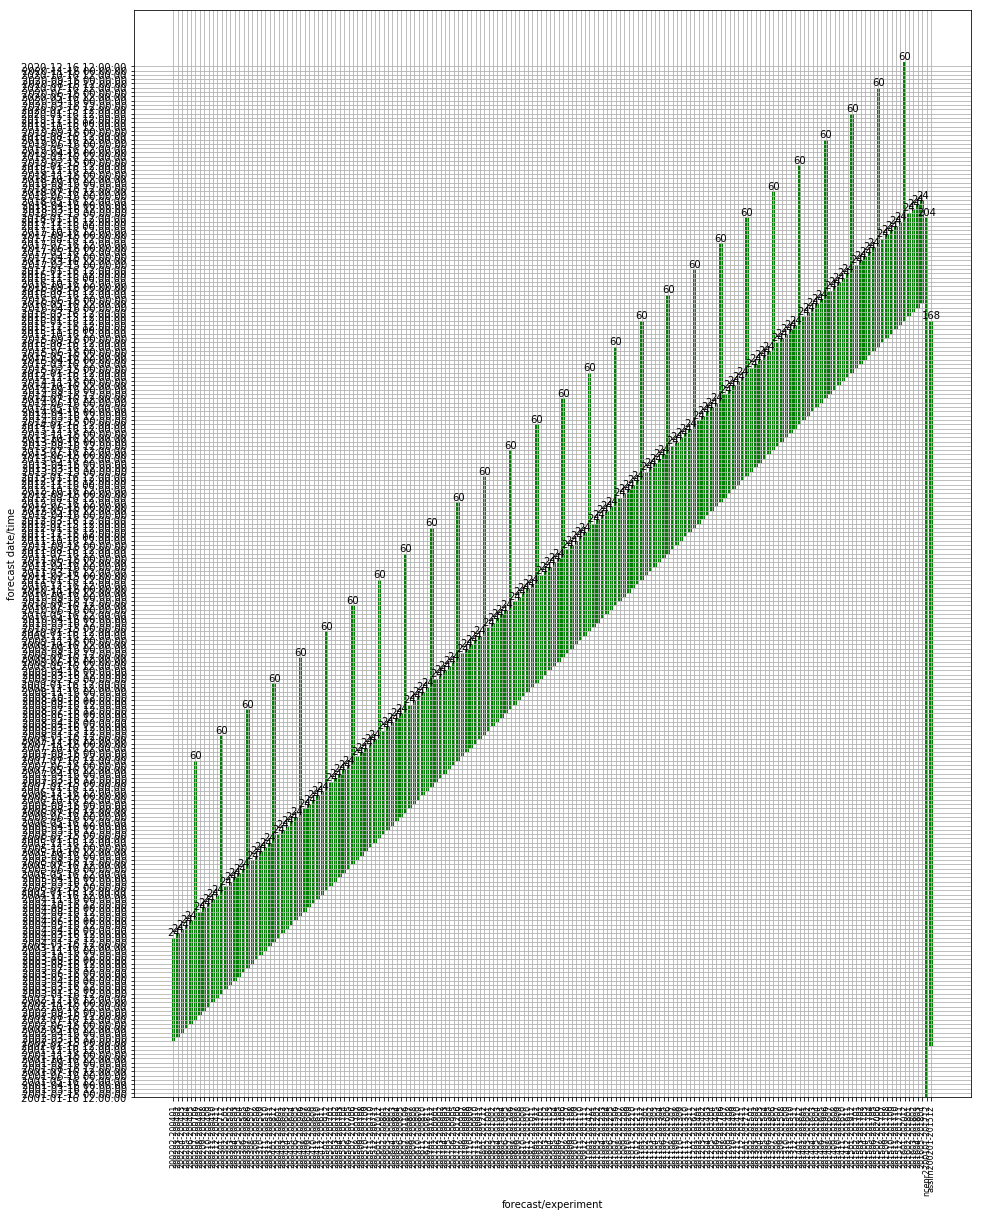

saving to PKL file eg5_data.pkl...
Pkl file exists and deleting...
END


In [5]:
print('BEGIN')

if(os.path.exists(input_files_name)):
  pickling_in = open(input_files_name, "rb")
  forc_input_files, assim_input_files, ncepr2_input_files \
  = pickle.load(pickling_in)
  pickling_in.close()
  
#print(forc_input_files, assim_input_files, ncepr2_input_files)
    
#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#datetime_all,datetime_uniq,ripf_all,ripf_uniq=file_spec_summary(forc_input_files,True)

test_v1=multi_forc_funcs(Diag=False, input_files=(forc_input_files, assim_input_files, ncepr2_input_files))

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

test_v1.calculate_filedatetime_info_multiforc(Diag=True, quantity='nino', ivars=('skt','tos','tos'), output_pkl='eg5_data.pkl', Clobber=True)

#test_v1.calculate_filedatetime_info_multiforc(Diag=True, quantity='latlon_region', ivars=('skt','tos','tos'))

print('END')

BEGIN
reading from PKL file eg5_data.pkl...
time_beg_index_keep= [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84
 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 0 12]
time_end_index_keep= [36 37 38 39 40 77 42 43 44 45 46 83 48 49 50 51 52 89 54 55 56 57 58 95
 60 61 62 63 64 101 66 67 68 69 70 107 72 73 74 75 76 113 78 79 80 81 82
 119 84 85 86 87 88 125 90 91 92 93 94 131 96 97 98 99 100 137 102 103 104
 105 106 143 108 109 110 111 112 149 114 115 116 117 118 155 120 121 122
 123

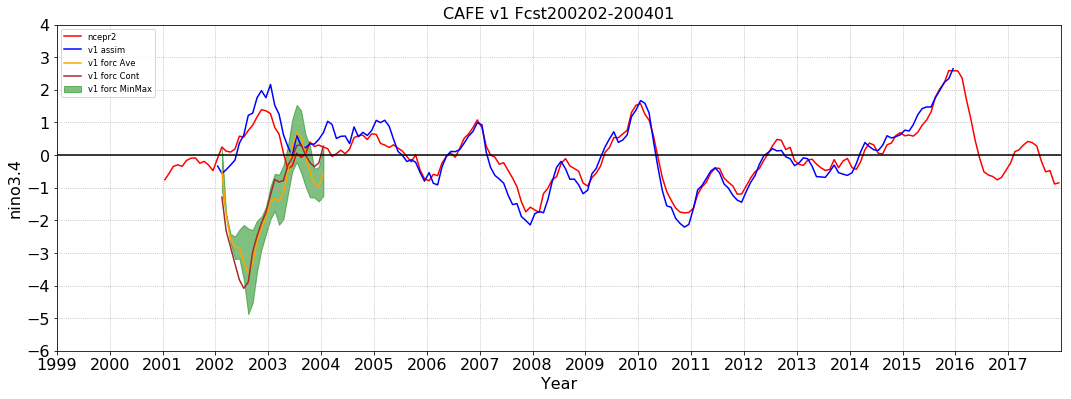

END


In [6]:
print('BEGIN')

from n_data_funcs import n_data_funcs

input_data_name='eg5_data.pkl'   

print(CRED+'reading from PKL file '+input_data_name+'...'+CEND)

from decadal_diag import check_valid_data_plot, plot_xy

if(os.path.exists(input_data_name)):
  pickling_in = bz2.BZ2File(input_data_name, "rb")
  quantity_monthly_ensemble, quantity_monthly_ncepr1, quantity_monthly_assim, time_beg_index_keep, time_end_index_keep, \
    check_valid_data, date_full, time_full, year_fraction_monthly_full, datetime_uniq, time_units, time_calendar, \
    years_months_full \
    = pickle.load(pickling_in)
  pickling_in.close()
  
#check_valid_data_plot(Diag=False, times=date_full, forecasts=datetime_uniq, data=check_valid_data,  xysize=(15,20))

enso_index=0

print('time_beg_index_keep=',time_beg_index_keep)
print('time_end_index_keep=',time_end_index_keep)
print('quantity_monthly_ensemble.shape=',quantity_monthly_ensemble.shape)
print('quantity_monthly_ncepr1.shape=',quantity_monthly_ncepr1.shape)
print('quantity_monthly_assim.shape=',quantity_monthly_assim.shape)
# print('date_full=',date_full)
# print('time_full=',time_full)
#print('year_fraction_monthly_full=',year_fraction_monthly_full)
print('year_fraction_monthly_full.size=',year_fraction_monthly_full.size)
print('datetime_uniq=',datetime_uniq)
# print('check_valid_data=',check_valid_data)
print('time_units=',time_units)
print('time_calendar=',time_calendar)
print('years_months_full=',years_months_full)

#===============================================================================

dummy_ncepr2 = n_data_funcs(Diag=False, input_files=None, input_var_name=None, \
  dummy_mode=(False, date_full, time_full, time_units, time_calendar)) #I think boolean for dummy_mode should be False but seems to work.

# cbeg_ncepr2=2001
# cend_ncepr2=2010
# abeg_ncepr2=2001
# aend_ncepr2=2010

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

quantity_monthlyclimatology_ncepr2, quantity_monthlyanomaly_ncepr2= \
  dummy_ncepr2.monthly_clim_anom( \
  Diag=False, input=quantity_monthly_ncepr1, AnnOut=False, ZeroClim=False) #, \
#   cbeg=cbeg_ncepr2, cend=cend_ncepr2, abeg=abeg_ncepr2, aend=aend_ncepr2)

print('quantity_monthlyclimatology_ncepr2.shape=',quantity_monthlyclimatology_ncepr2.shape)
print('quantity_monthlyanomaly_ncepr2.shape=',quantity_monthlyanomaly_ncepr2.shape)

#===============================================================================

dummy_assim = n_data_funcs(Diag=False, input_files=None, input_var_name=None, \
  dummy_mode=(False, date_full, time_full, time_units, time_calendar)) #I think boolean for dummy_mode should be False but seems to work.

# cbeg_assim=2002
# cend_assim=2015
# abeg_assim=2002
# aend_assim=2015

cafe_quantity_monthlyclimatology_assim, cafe_quantity_monthlyanomaly_assim= \
  dummy_assim.monthly_clim_anom( \
  Diag=False, input=quantity_monthly_assim, AnnOut=False, ZeroClim=False) #, \
#   cbeg=cbeg_assim, cend=cend_assim, abeg=abeg_assim, aend=aend_assim)

print('cafe_quantity_monthlyclimatology_assim.shape=',cafe_quantity_monthlyclimatology_assim.shape)
print('cafe_quantity_monthlyanomaly_assim.shape=',cafe_quantity_monthlyanomaly_assim.shape)

#===============================================================================

dummy_v1forc = n_data_funcs(Diag=False, input_files=None, input_var_name=None, \
  dummy_mode=(False, date_full, time_full, time_units, time_calendar)) #I think boolean for dummy_mode should be False but seems to work.

cbeg_v1forc=2002
cend_v1forc=2015
abeg_v1forc=2002
aend_v1forc=2015

#print(quantity_monthly_ensemble.shape)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

clim_shape_v1=[dummy_assim.nmy, *quantity_monthly_ensemble.shape[1::]]

print('clim_shape_v1=',clim_shape_v1)

#need to build up clim
clim_for_v1=ma.zeros(clim_shape_v1,dtype='f') #nmy, ensembles, forecasts, nino
for enow in range(clim_shape_v1[1]):
  for fnow in range(clim_shape_v1[2]):
    clim_for_v1[:,enow,fnow,:]=cafe_quantity_monthlyclimatology_assim #12, 4
    
print('clim_for_v1.shape=',clim_for_v1.shape)

cafe_quantity_monthlyanomaly_v1forc= \
  dummy_v1forc.monthly_clim_anom( \
  Diag=False, input=quantity_monthly_ensemble, AnnOut=False, ZeroClim=False, \
  cbeg=cbeg_v1forc, cend=cend_v1forc, abeg=abeg_v1forc, aend=aend_v1forc, clim=clim_for_v1)
  
print('cafe_quantity_monthlyanomaly_v1forc.shape=',cafe_quantity_monthlyanomaly_v1forc.shape)
  
#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

input_xvals = (dummy_ncepr2.year_fraction_anomaly,)
input_datas = (quantity_monthlyanomaly_ncepr2[:,0],) #ncepr1

input_xvals = input_xvals + (dummy_assim.year_fraction_anomaly,)
input_datas = input_datas + (cafe_quantity_monthlyanomaly_assim[:,enso_index],) #assim

input_xvals = input_xvals + (dummy_v1forc.year_fraction_anomaly,)
input_xvals = input_xvals + (dummy_v1forc.year_fraction_anomaly,)
input_xvals = input_xvals + (dummy_v1forc.year_fraction_anomaly,)
input_xvals = input_xvals + (dummy_v1forc.year_fraction_anomaly,)

forecast_num=6
forecast_num=0
#forecast_num=11
#forecast_num=59

#ensemble at 0 is control run, so ignore it in ensemble stats.
input_datas = input_datas + (np.min(cafe_quantity_monthlyanomaly_v1forc[:,1::,forecast_num,enso_index],axis=1),)
input_datas = input_datas + (np.max(cafe_quantity_monthlyanomaly_v1forc[:,1::,forecast_num,enso_index],axis=1),)
input_datas = input_datas + (np.average(cafe_quantity_monthlyanomaly_v1forc[:,1::,forecast_num,enso_index],axis=1),)
input_datas = input_datas + (cafe_quantity_monthlyanomaly_v1forc[:,0,forecast_num,enso_index],)

plot_xy(Diag=False,input_data=input_datas,input_xvals=input_xvals, \
  title='CAFE v1 Fcst'+datetime_uniq[forecast_num], \
  units='$\!^\circ$C', \
  xlab='Year', \
  ylab='nino3.4', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  line_colors=['red','blue','green','orange','brown'], \
  line_labels=['ncepr2','v1 assim','v1 forc MinMax','v1 forc Ave','v1 forc Cont'], \
  legend_position='best', \
  fill_between=[0,1,2,2,3,4], \
  line_alphas=[1.,1.,.5,1.,1.], \
  xlim=[1999,2018], \
  xticks=np.arange(1999,2018,1), \
  grid=True, \
  grid_linestyle='dotted', \
  legend_fontsize='small', \
  xysize=(18,6))
  
#===============================================================================

print('END')